# Unconstrained optimization

In this chapter, we'll cover how to apply `scipy.optimize.minimize` to unconstrained optimization problems. As a reminder, unconstrained optimization considers:

$$\mathop {\min }\limits_x f\left( x \right)$$
with $x$ the design variable of length $n$ and $f$ the objective function.

## Method
In this course, we're making use of the function `scipy.optimize.minimize`. The documentation of this function is available here: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html. In this course we'll cover only the relevant parts.

For unconstrained optimization we need to run at least `scipy.optimize.minimize(fun, x0, ...)` with:
- `fun`, the objective function $f(x)$ to be minimized. `fun` is a callable. The `scipy.optmize.minimize` function takes care of defining and inputing our design variable $x$.
- `x0`, the initial guess for our design variable $x$. It needs to be a `ndarray` with length $n$

The function `scipy.optimize.minimize` outputs an object `scipy.optimize.OptimizeResult`. with:
- `scipy.optimize.OptimizeResult.x` the optimized solution of the design variable `x`. It is a `ndarray` with length $n$
- `scipy.optimize.OptimizeResult.success`, a indication whether or not the optimizer was executed succesfully. It is a `bool`, indicating `True` or `False`
- `scipy.optimize.OptimizeResult.message`, a message describing the cause of termination of the optimizatino algorithm. It is a `str`.
- `scipy.optimize.OptimizeResult.fun`, the values of the optimized objective function $f$. It is a `int` or `float`
- `scipy.optimize.OptimizeResult.nit`, the number of iteration performed by the optimizer. It is a `int`


## Example 1

### Problem
It is desired to determine the number of bathymetry maps $n$ of a local area that should be produced to maximize the profit of a company. The total cost of production and distribution is €$75$ per unit $n$. The revenues are proportional to the number of units multiplied by its price: $Revenues = n \cdot Price $

The demand depends on the price ($Price = 150 - 0.01n^2$), as shown in the graph:

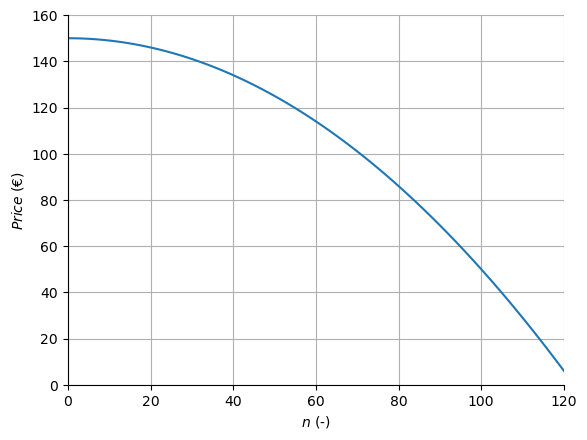

In [2]:
import numpy as np
import matplotlib.pylab as plt
n = np.linspace(0,120,100)
price = 150 - 0.01 * n**2
plt.plot(n,price)
plt.xlabel('$n$ (-)')
plt.ylabel('$Price$ (€)')
plt.ylim(0,160)
plt.xlim(0,120)
ax = plt.gca()
ax.grid(True, which='both')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

The profit can be estimated as the revenues minus the total costs.

### Model
The function for the profit can be found by combining the relations in the problem statement. However, this is the profit which should be maximized. To turn this into a minimization problem, the profit can be multiplied with $-1$. The final model of this problem results in:

$$ \mathop {\min }\limits_n \left(75n - \left( 150 - 0.01n^2 \right) n \right) $$

### Method

This model is described using `scipy.optimize.minimize` according to the standard structure in this course.


#### Importing libraries
For this problem, we'll use all three packages `scipy`, `numpy`, `matplotlib`.

In [3]:
import scipy as sp 
import numpy as np
import matplotlib.pylab as plt

#### Defining the variables
There are very few variables in this problem. In fact, the only variable we have to specify is the initial guess for the optimization algorithm. The objective function will be treated later.
The length of $n$ doesn't have to be specified.

In [4]:
n0 = 20

#### Defining the objective function
In the objective function, the formula given in the model description can be inserted. Or, each individual step can be calculated on a seperate line. Again, note that the profit is multiplied with $-1$ to maximize the profit in the minimization formulation.
This results in:

In [5]:
def negprofit(n):
    price = 150 - 0.01 * n**2
    revenues = price * n
    totalcost = 75 * n
    profit = revenues - totalcost
    return -profit

#### Solving the problem
Now, the problem can be solved. The result is stored in the variables `result` which is printed.

In [6]:
result = sp.optimize.minimize(negprofit,n0)
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -2499.9999999998727
        x: [ 5.000e+01]
      nit: 8
      jac: [ 0.000e+00]
 hess_inv: [[ 3.503e-01]]
     nfev: 22
     njev: 11


#### Postprocessing
As this case is only one-dimensional and the potential range of values is limited, we can easily check this answer by an exhaustive search, evaluating all possible values for $n$. The plot below shows the $\text{negative profit}$ for $0<n<100$. It shows a clear minimum which coincides with the minimum found by `scipy.optimize.minimize`

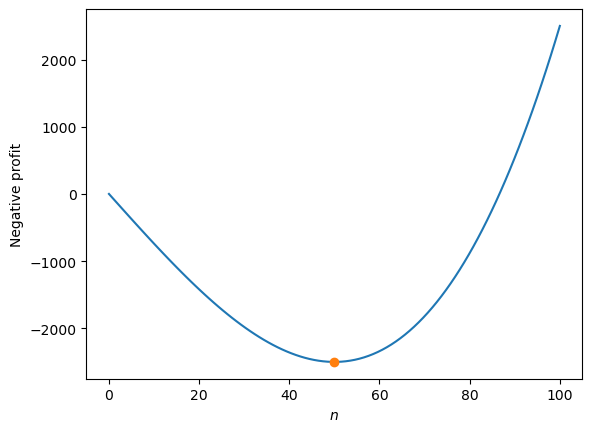

In [7]:
n_range = np.linspace(0,100,100)
negprofit_result = negprofit(n_range)
plt.plot(n_range,negprofit_result)
plt.plot(result.x,result.fun,'o');
plt.xlabel('$n$')
plt.ylabel('Negative profit');

## Example 2

### Problem
8 data points are collected where $X_i$ is the explanatory variable and $Y_i$ the response variable. It is believed that the data follows the trend $Y = aX^b+c$ where $a$, $b$ and $c$ are the parameters to be determined to fit the model.

| $X_i$  | $Y_i$  |
| :----- | :----- |
| 0.97   | 0.97   |
| 0      | 0.06   |
| 0.5    | 0.7    |
| 0.85   | 0.74   |
| 0.7    | 0.2    |
| 0.19   | 0.34   |
| 0.41   | 0.29   |
| 0.78   | 0.94   |

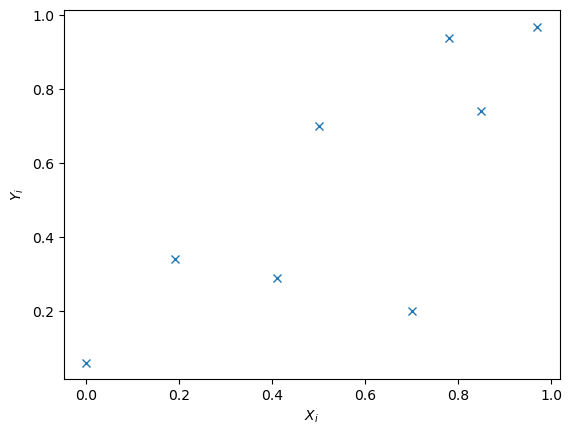

In [8]:
xi = np.array([0.97,0,0.5,0.85,0.7,0.19,0.41,0.78])
yi = np.array([0.97,0.06,0.7,0.74,0.2,0.34,0.29,0.94])
plt.xlabel('$X_i$')
plt.ylabel('$Y_i$')
plt.plot(xi,yi,'x');

Examples of the source of this data can be:
 - Stress of a pre-stressed concrete specimen based on the deformation when applied an axial force
 - Permeability-coefficient for compacted sand based on the grain size
 - Job performance based on the number of working hours
 - etc.


### Model
The problem is modelled as a minimization of the squared error, where error is the difference between $a X_i^b+C$ and $Y_i$
$$\mathop {\min }\limits_{a,b,c} \sum\limits_{i = 1}^8 {{{\left( {a{X_i}^b + c - {Y_i}} \right)}^2}} $$

The plot below shows the data points and the total error squared.

In [9]:
from ipywidgets import widgets, interact
x_range = np.linspace(0.0001,1,100)
def func(a,b,c):
    fig, ax = plt.subplots(1, 1)
    ax.plot(xi,yi,'x')
    ax.plot(x_range,a * x_range**b + c);
    ax.set_xlim([-0,1])
    ax.set_ylim([-0,1])
    y_est = a * xi ** b + c
    error = np.sum((yi-y_est)**2)
    title = 'Total error squared $=$'+str(round(error,4))
    ax.set_title(title)
    for i in range(8):
        ax.annotate("",xy=[xi[i],yi[i]],xytext=[xi[i],max(min(a * xi[i] ** b + c,1),0)],arrowprops=dict(arrowstyle= '<->'))
    return
    plt.show()

interact(func,
         a = widgets.FloatSlider(min=0, max=5, value=2, step=0.2, description="a"),
         b = widgets.FloatSlider(min=0, max=5, value=2, step=0.2, description="b"),
         c = widgets.FloatSlider(min=0, max=1, value=0.5, step=0.05, description="c"));

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, step=0.2), FloatSlider(value=2.0, descr…

### Method

Again, this model is described using `scipy.optimize.minimize` according to the [standard structure in this course](./Python_start_3.ipynb)

#### Importing libraries


In [10]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

#### Defining the variables
In this problem, there are 3 design variables: $a$, $b$ and $c$. In `scipy.optimize`, these variables are part of one array. You don't have to specify this variable beforehand, but the optimization algorithm will define the number of variables on your other input. Furthermore, input data is given which is required to specify explicitly. Additionally, an initial guess is required for the otimization algorithm.

In [11]:
xi = np.array([0.97, 0   , 0.5, 0.85, 0.7, 0.19, 0.41, 0.78])
yi = np.array([0.97, 0.06, 0.7, 0.74, 0.2, 0.34, 0.29, 0.94])
abc0 = np.array([4., 2., 0.5]) #initial guess

#### Objective function
The objective function was alerady defined. Because `a`, `b`, `c` and `xi` are all numpy arrays, we can simply use `*`, `**` and `+` to deal with the multiplication, exponent and summation of those arrays. `np.sum` is used to sum up all components of the array which is the result of `(yi-y_est)**2`

In [76]:
def squarederror(abc):
    a = abc[0]
    b = abc[1]
    c = abc[2]
    y_est = a * xi ** b + c
    error = np.sum((yi-y_est)**2)
    return error

#### Solve the problem
Now we can solve the actual problem

In [77]:
result = sp.optimize.minimize(squarederror,abc0)
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.3342203980898386
        x: [ 8.028e-01  1.231e+00  1.233e-01]
      nit: 54
      jac: [-2.332e-06  2.570e-06 -3.166e-06]
 hess_inv: [[ 6.233e-01 -3.674e-01 -3.660e-01]
            [-3.674e-01  1.485e+01  2.251e+00]
            [-3.660e-01  2.251e+00  5.564e-01]]
     nfev: 276
     njev: 69


#### Postprocessing
As this problem involves three design variables, a plot of all possible design variables with the objective function is not possible because it would require four dimensions. However, we can plot the data which the obtained solution to see how it looks like

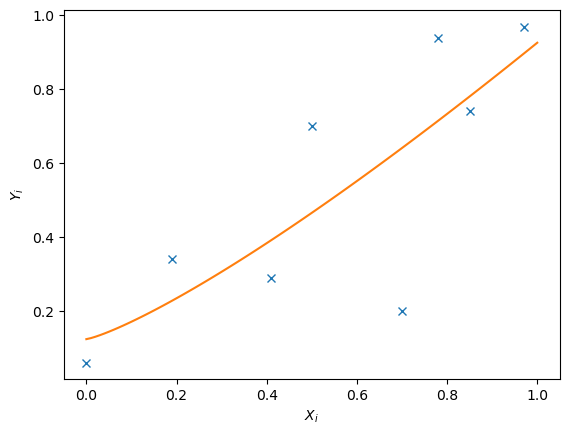

In [78]:
x_range = np.linspace(0,1,100)
plt.plot(xi,yi,'x');
plt.plot(x_range,result.x[0] * x_range ** result.x[1] + result.x[2])
plt.xlabel('$X_i$')
plt.ylabel('$Y_i$');

## Summary

To solve uncontrained optimisation problem like:

$$
    \mathop {\min }\limits_x f\left( x \right)
$$

with $x$ the design variable of length $n$, you can make use  of `scipy.optimize.minimize(fun, x0, ...)` which outputs `scipy.optimize.OptimizeResult` with the problem's solution, some characteristics of the problem and the performance of the optimization algorithm.